In [ ]:
import os
print(os.getcwd())
#change working directory to the location of the data file
os.chdir('/mnt/d/Sajjad/08-2023/Python Code/Introduction to Machine Learning/')
print(os.getcwd())

In [50]:
import pandas as pd
from sklearn import datasets

In [51]:
iris = datasets.load_iris()
X = iris.data

In [52]:
X.shape

(150, 4)

In [53]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [54]:
Xdf = pd.DataFrame(X)
Xdf.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [55]:
X2 = StandardScaler().fit_transform(X)
X2df = pd.DataFrame(X2)
X2df.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [56]:
Xdf.cov() # sum the diagnoal element to count the total variance in the data

,0,1,2,3
0,0.685694,-0.042434,1.274315,0.516271
1,-0.042434,0.189979,-0.329656,-0.121639
2,1.274315,-0.329656,3.116278,1.295609
3,0.516271,-0.121639,1.295609,0.581006


In [57]:
from sklearn.decomposition import PCA


In [58]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principaldf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4'])

In [59]:
principaldf.head()

,pc1,pc2,pc3,pc4
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [63]:
#compute cosine similarity (orthonormal vectors))
import numpy as np
from numpy import dot
from numpy.linalg import norm
cos_sim = np.zeros((4,4)).round(3)
for i in range(4):
    for j in range(4):
        cos_sim[i,j] = dot(principaldf['pc'+str(i+1)], principaldf['pc'+str(j+1)])/(norm(principaldf['pc'+str(i+1)])*norm(principaldf['pc'+str(j+1)])).round(3)
cos_sim

array([[1.00000002e+00, 2.39066112e-17, 3.75762610e-17, 2.93393117e-17],
       [2.39066112e-17, 9.99998380e-01, 2.10935344e-16, 3.55149882e-17],
       [3.75762610e-17, 2.10935344e-16, 1.00001849e+00, 2.15728087e-18],
       [2.93393117e-17, 3.55149882e-17, 2.15728087e-18, 1.00012077e+00]])

In [64]:

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [65]:
#compute covariance matrix of the principal components
principaldf.cov().round(4) #sum the diagnoal variance to compute the total variance and match it with the origianl data
#are the values same as eigen values?

,pc1,pc2,pc3,pc4
pc1,4.2282,0.0000,0.0000,0.0000
pc2,0.0000,0.2427,0.0000,0.0000
pc3,0.0000,0.0000,0.0782,0.0000
pc4,0.0000,0.0000,0.0000,0.0238


In [66]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X2)
principaldf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])

In [67]:
pca2.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [68]:
from numpy import linalg as LA

In [69]:
import numpy as np

In [70]:
#round off the number to two decimal places

principaldf.corr().round(3)

,pc1,pc2,pc3,pc4
pc1,1.0,-0.0,0.0,0.0
pc2,-0.0,1.0,0.0,0.0
pc3,0.0,0.0,1.0,0.0
pc4,0.0,0.0,0.0,1.0


In [71]:
LA.eig(Xdf.cov())

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [72]:
df1 = pd.read_csv("default_cc.csv")

# Changed Gender from int64 to str
df1['Gender'] = df1['Gender'].astype('str')

# Changed EDUCATION from int64 to str
df1['EDUCATION'] = df1['EDUCATION'].astype('str')

# Changed MARRIAGE from int64 to str
df1['MARRIAGE'] = df1['MARRIAGE'].astype('str')

# Deleted column ID from df1
df1.drop(['ID'], axis=1, inplace=True)

df_onehot = pd.get_dummies(df1)
X = df_onehot.loc[:, df_onehot.columns != 'default payment next month']
y = df_onehot[['default payment next month']]

In [73]:
X.shape

(30000, 33)

In [ ]:
from sklearn.decomposition import PCA

In [74]:
pca = PCA(n_components=33)
principalComponents = pca.fit_transform(X)
principaldf = pd.DataFrame(data = principalComponents) #, columns = ['pc1', 'pc2','pc3','pc4'])
pca.explained_variance_ratio_

array([6.10437013e-01, 2.95353813e-01, 3.05241925e-02, 1.69285926e-02,
       9.42041926e-03, 9.04174544e-03, 7.54445790e-03, 6.38481379e-03,
       5.83708771e-03, 2.96671412e-03, 2.38506002e-03, 1.69774353e-03,
       1.47834530e-03, 1.83262261e-09, 9.38272046e-11, 1.94309339e-11,
       1.18159024e-11, 1.09156014e-11, 9.06234179e-12, 7.83601088e-12,
       7.27950505e-12, 5.77263587e-12, 4.01113574e-12, 3.85599857e-12,
       3.53307810e-13, 2.85496637e-13, 1.09657125e-13, 5.13865542e-14,
       4.35810416e-14, 1.18008147e-14, 4.74076523e-33, 4.74076523e-33,
       4.74076523e-33])

In [75]:
pca.explained_variance_ratio_.round(3)

array([0.61 , 0.295, 0.031, 0.017, 0.009, 0.009, 0.008, 0.006, 0.006,
       0.003, 0.002, 0.002, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

Text(0, 0.5, 'cumulative explained variance')

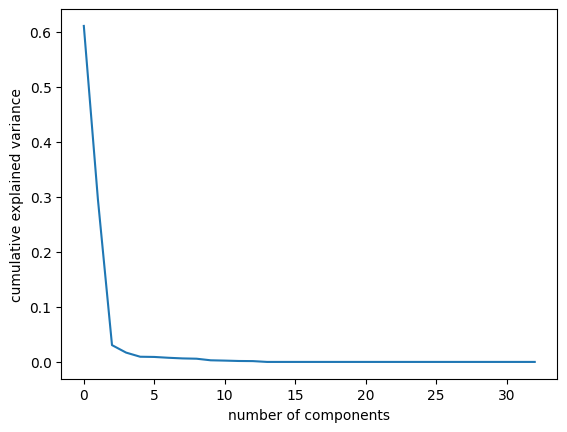

In [76]:
#plot an elbow graph to find the optimal number of components
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [77]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principaldf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4', 'pc5', 'pc6','pc7','pc8', 'pc9', 'pc10'])

In [78]:
principaldf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-166488.191086,-75538.153664,-472.952106,-138.240596,356.372601,-22.858176,-861.737802,79.013084,189.499608,714.585845
1,-114226.976817,9780.671250,2734.447477,-1567.195890,-4050.710334,696.602606,-1516.058527,1261.720752,-626.282075,483.598389
2,-98432.362181,-33471.387331,-2678.469790,-5102.262357,3361.177076,177.028488,-6986.944318,1612.055662,-2283.836425,4599.925597
3,-71230.675903,-95224.273104,-10047.716972,4420.222964,-637.932441,6192.886364,2367.988856,837.225566,547.526631,-1815.577038
4,-114834.618365,-68729.185234,24604.948085,34257.290425,8197.837874,4668.730523,-11838.007528,2722.672426,7678.722531,-625.666837


In [79]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
import time
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [80]:
trainX, testX, trainy, testy = train_test_split(principaldf, y, test_size=0.3, random_state=2)

In [81]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Depth 5 Split 2  :  0.6582183032110892
Scaled k-NN  :  0.6098958451145615
Naive Bayes  :  0.6315045264254081
Voting Classifier  :  0.6537411621103677


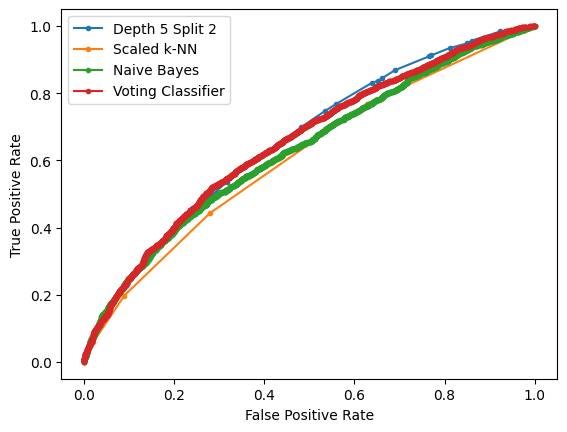

In [82]:
#trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3)#, random_state=2)

dt_5_2 = DecisionTreeClassifier(max_depth=5)  
fit_model(dt_5_2, "Depth 5 Split 2") 

pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
fit_model(pipe_kn, "Scaled k-NN")

gnb = GaussianNB()
fit_model(gnb, "Naive Bayes") 

v_clf = VotingClassifier(estimators=[('nb', gnb), ('dt', dt_5_2), ('knn', pipe_kn)], voting='soft')
fit_model(v_clf, "Voting Classifier")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [83]:
num_of_models = 100

Random Forest  :  0.6931227954488645
Total time RF:  5.3042356967926025
Extra Tree Classifier  :  0.6933621661444511
Total time RF:  5.31492280960083
Voting Classifier  :  0.6537411621103677
Total time RF:  0.38599467277526855


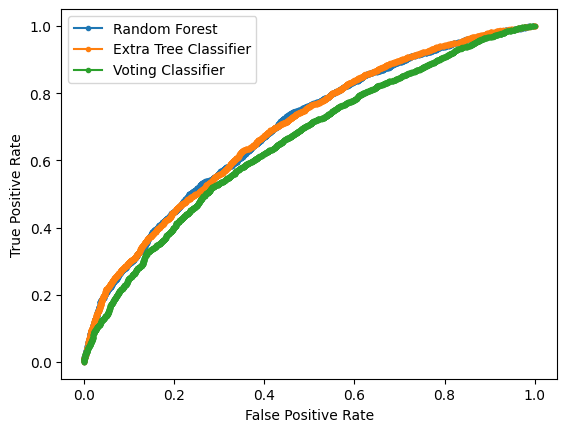

In [84]:
start_time = time.time()
rf = RandomForestClassifier(max_depth=10,n_estimators=num_of_models)#bootstrap by default is True
fit_model(rf, "Random Forest")
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=num_of_models, bootstrap=True) #boostrap by default is False
fit_model(rf, "Extra Tree Classifier")
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

start_time = time.time()
v_clf = VotingClassifier(estimators=[('nb', gnb), ('dt', dt_5_2), ('knn', pipe_kn)], voting='soft')
fit_model(v_clf, "Voting Classifier")
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [89]:
pca = PCA(n_components=30) # try 15, 20, 25
principalComponents = pca.fit_transform(X)
principaldf = pd.DataFrame(data = principalComponents) #
trainX, testX, trainy, testy = train_test_split(principaldf, y, test_size=0.3, random_state=2)

Random Forest  :  0.7789719071573841
Total time RF:  9.004369258880615
Extra Tree Classifier  :  0.779957808051617
Total time RF:  8.864170789718628
Voting Classifier  :  0.7304401428665099
Total time RF:  0.8548595905303955


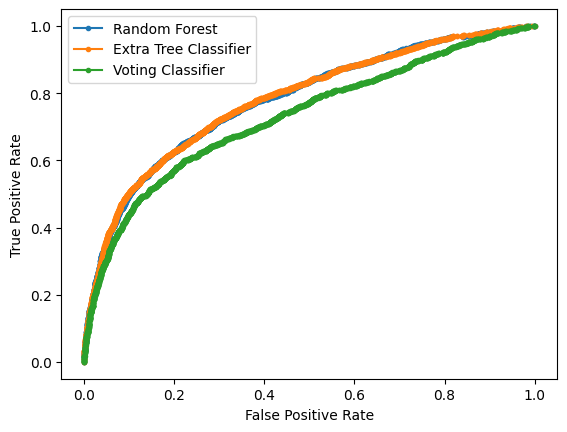

In [90]:
start_time = time.time()
rf = RandomForestClassifier(max_depth=10,n_estimators=num_of_models)#bootstrap by default is True
fit_model(rf, "Random Forest")
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

start_time = time.time()
et_clf = ExtraTreesClassifier(n_estimators=num_of_models, bootstrap=True) #boostrap by default is False
fit_model(rf, "Extra Tree Classifier")
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

start_time = time.time()
v_clf = VotingClassifier(estimators=[('nb', gnb), ('dt', dt_5_2), ('knn', pipe_kn)], voting='soft')
fit_model(v_clf, "Voting Classifier")
end_time = time.time()
#calculate the total time
total_time = end_time - start_time
print("Total time RF: ", total_time)

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()